In [1]:
# 1. 일원분산분석

# 분석 시나리오
# A쇼핑 고객들의 구매유형별 총 매출액의 차이가 있는지를 일원분산분석을 통해 검정해 보고자 한다. 
# A쇼핑에서 관리하는 고객들의 구매유형과 고객 수는 다음과 같다. 이를 위한 가설은 다음과 같다. 

# H0 (귀무가설)= A쇼핑 고객의 구매유형에 따른 총 매출액의 차이는 없다.
# H1 (연구가설)= A쇼핑 고객은 적어도 1개의 구매유형이 다른 구매유형과 총 매출액 차이가 존재한다.

In [4]:
# 1-1. 모듈 및 데이터 탑재
import pandas as pd
import scipy as sp
import numpy as np
import pingouin as pg
import scikit_posthocs

df = pd.read_csv('Ashopping.csv',sep=',', encoding='CP949')
df1=df[['구매유형','총_매출액']]
pd.options.display.float_format = '{:.3f}'.format

# 1-2. 등분산 검정
구매유형 = [ ]
for i in range(1,5,1):
    구매유형.append(df1[df1.구매유형==i].총_매출액)
sp.stats.levene(구매유형[0],구매유형[1], 구매유형[2], 구매유형[3])

LeveneResult(statistic=61.83834278363635, pvalue=1.1483869977419955e-36)

In [5]:
# !pip install scikit_posthocs

In [6]:
# 코드 실행 결과, 구매유형별 고객 간의 등분산 검정 결과 F값은 61.83, 유의확률은 0.01 미만으로 귀무가설이 기각되었다.
# 즉, 4개 집단의 분산은 동일하지 않은 것으로 나타났다.

In [7]:
# 1-3. Welch 일원분산분석 
print(pg.welch_anova(dv='총_매출액', between='구매유형', data=df1))

# 1-4. 사후분석
df1['구매유형'].astype(str)
print(scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='구매유형', sort=True))

# 1-5. 구매유형별 평균 총매출액
print(구매유형[0].mean(),구매유형[1].mean(),구매유형[2].mean(),구매유형[3].mean())

  Source  ddof1   ddof2      F  p-unc   np2
0   구매유형      3 230.936 88.238  0.000 0.193
      1     2     3     4
1 1.000 0.000 0.000 0.805
2 0.000 1.000 0.008 0.000
3 0.000 0.008 1.000 0.000
4 0.805 0.000 0.000 1.000
3403682.3255813955 9612645.078864353 11779839.652777778 4392794.395161291


In [8]:
# 1-5. 결과
# 분석 결과 F value 88.23, 유의확률은 0.01 이하로 나타나
# 'A쇼핑 고객은 적어도 1개의 구매유형은 다른 구매유형과 총 매출액 차이가 존재한다'는 연구가설을 채택한다. 
# 사후분석표를 통해 1번 구매유형과 4번 구매유형 고객들간 총 매출액 차이는 없지만, 
# 나머지 집단간의 매출액 차이는 통계적으로 유의하다고 할 수 있다.

In [9]:
# 2. 이원분산분석

# 분석 시나리오
# 이번에는 구매유형과 거주지역에 따라 고객들의 총 매출액이 다른지 검정해 보자 한다. 
# 이원분산분석의 가설은 제1 독립변수의 효과, 제2 독립변수의 효과, 
# 그리고 상호작용 효과에 대해 논하는 가설로 분리하여 설정하는 것이 바람직하다.

### ① 구매유형에 따른 매출액 차이 가설
#### H0 (귀무가설)= 구매유형에 따른 총 매출액의 차이는 없다.
#### H1 (연구가설)= 적어도 1개의 구매유형이 다른 구매유형과 총 매출액 차이가 존재한다.

### ② 거주지역에 따른 매출액 차이 가설
#### H0 (귀무가설)= 거주지역에 따른 총 매출액의 차이는 없다.
#### H1 (연구가설)= 적어도 1개의 거주지역이 다른 거주지역과 총 매출액 차이가 존재한다.

### ③ 독립변수간 상호작용에 대한 가설
#### H0 (귀무가설)= 구매유형과 거주지역의 상호작용 효과는 없다.
#### H1 (연구가설)= 구매유형과 거주지역의 상호작용 효과가 있다.

In [10]:
# 2-1. 모듈 및 데이터 탑재
import pandas as pd
import scipy as sp
import numpy as np
import pingouin as pg
import scikit_posthocs

df = pd.read_csv('Ashopping.csv',sep=',', encoding='CP949')
df1=df[['총_매출액','구매유형','거주지역']]
pd.options.display.float_format = '{:.3f}'.format

# 2-2. 이원분산분석
print(pg.anova(dv='총_매출액', between=['구매유형','거주지역'], data=df1))

# 2-3. 사후분석
df1['구매유형'].astype(str)
df1['거주지역'].astype(str)
print(scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='구매유형', sort=True))
print(scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='거주지역', sort=True))

# 2-4. 구매유형, 거주지역별 평균 총 매출액
pd.pivot_table(df1, index='구매유형', columns='거주지역', values='총_매출액', aggfunc=np.mean)

        Source                    SS      DF                   MS      F  \
0         구매유형  9287823078170928.000   3.000 3095941026056976.000 94.142   
1         거주지역 16139331218813640.000   6.000 2689888536468940.000 81.795   
2  구매유형 * 거주지역  3867936213048948.500  18.000  214885345169386.031  6.534   
3     Residual 32096439113329672.000 976.000   32885695812837.777    NaN   

   p-unc   np2  
0  0.000 0.224  
1  0.000 0.335  
2  0.000 0.108  
3    NaN   NaN  
      1     2     3     4
1 1.000 0.000 0.000 0.805
2 0.000 1.000 0.008 0.000
3 0.000 0.008 1.000 0.000
4 0.805 0.000 0.000 1.000
      1     2     3     4     5     6     7
1 1.000 1.000 1.000 1.000 1.000 0.988 0.412
2 1.000 1.000 1.000 0.980 0.965 0.339 0.000
3 1.000 1.000 1.000 0.978 0.935 0.019 0.000
4 1.000 0.980 0.978 1.000 1.000 0.008 0.000
5 1.000 0.965 0.935 1.000 1.000 0.002 0.000
6 0.988 0.339 0.019 0.008 0.002 1.000 0.000
7 0.412 0.000 0.000 0.000 0.000 0.000 1.000


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


거주지역,1,2,3,4,5,6,7
구매유형,,,,,,,
1,NaN,3281350.000,3002825.000,3041428.182,3637031.667,3712146.667,3864880.000
2,NaN,NaN,4215648.571,8278686.562,6590330.674,10226770.763,13513839.437
3,4906400.000,3215055.000,6809777.143,7965439.677,11046081.250,13768678.750,25451441.176
4,NaN,4034175.556,3720989.697,4229915.000,4272964.468,4749139.200,5138468.276


In [11]:
# 코드 실행 결과 구매유형의 F값은 65.18, 거주지역의 F값은 81.80, 
# 두 변수 간의 상호작용 효과의 F값은 6.53이고 유의확률은 모두 0.01이하로 출력되었다. 
# 사후분석결과, 구매유형은 구매유형(1)과 구매유형(4)를 제외한 나머지 유형 간의 총 매출액 차이가 유의하고, 
# 거주지역은 3과 6. 4와6, 5와6, 27, 37, 47, 5와7, 6과 그룹간의 총 매출액 차이가 유의하게 나타났다. 
# 마지막으로 구매유형, 거주지역별 평균 총 매출액이 테이블 형태로 출력되었다.

In [12]:
# 결과 해석
# 이원분산분석 결과 모든 귀무가설을 기각하고, 연구가설을 채택하게 되었다. 
# 즉, 매출액은 구매유형에 따라, 거주지역에 따라 달라진다고 볼 수 있으며, 구매유형과 거주지역 간의 상호작용 효과 또한 유의하다. 
# 따라서, 특정 구매유형과 특정 거주지역의 경우 다른 영역보다 매우 다른 매출액 차이를 보이고 있다는 점에 유의해야 한다. 
# 가령 거주지역이 이고 구매유형이 3인 영역은 타 영역에 비해 상당히 큰 매출액 현황을 보이고 있으므로 
# 해당 고객군을 위한 차별화된 마케팅 전략을 수립하는 것이 바람직해 보인다.

In [13]:
# 3. 다변량분산분석
# 다변량분산분석은 집단간 평균을 비교할 때뿐만 아니라, 
# 모집단에 대해 여러 상황을 제시하고 여러 개의 변수를 동시에 관찰하는 경우에도 유용하다.

In [14]:
# 분석 시나리오
# A쇼핑에서는 다변량분산분석을 통해 구매유형, 거주지역에 따라 방문빈도 및 총 매출액의 차이를 검정하려 한다. 
# 이러한 문제해결을 위해 아래와 같이 가설을 수립할 수 있다.

#### H0 (귀무가설)= A쇼핑 고객의 구매유형,거주지역에 따른 방문빈도,총 매출액의 차이는 없다.
#### H1 (연구가설)= A쇼핑 고객의 구매유형,거주지역에 따른 방문빈도,총 매출액의 차이는 있다.

In [15]:
# 4-1. 모듈 및 데이터 탑재
import pandas as pd
from statsmodels.multivariate.manova import MANOVA

df = pd.read_csv('Ashopping.csv',sep=',', encoding='CP949')
df1=df[['총_매출액','방문빈도','구매유형','거주지역']]
pd.options.display.float_format = '{:.3f}'.format

# 4-2. 다변량분산분석
print(MANOVA.from_formula('방문빈도 + 총_매출액 ~ 구매유형 +거주지역 ', data=df1).mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9578 2.0000 996.0000 21.9327 0.0000
          Pillai's trace 0.0422 2.0000 996.0000 21.9327 0.0000
  Hotelling-Lawley trace 0.0440 2.0000 996.0000 21.9327 0.0000
     Roy's greatest root 0.0440 2.0000 996.0000 21.9327 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          구매유형          Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.8248 2.0000 996.0000 105.8119 0.0000
         Pillai's trace 0.1752 2.0000 996.0000 105.8119 0.0000
 Hotelling-

In [16]:
# 다변량분산분석 전체 모형의 적합성, 그리고 거주지역과 구매유형에 대한 
# 각각의 다변량분산분석 모형의 결과가 순서대로 출력되었다.
# 모두 유의확률이 0.01 이하이므로 모형이 유의미하다.
# 다변량분산분석 모형이 유의하므로, 사후분석을 통해 더욱 상세한 결과를 찾아보았다.

In [17]:
# 4-3. 패키지 불러오기
import scikit_posthocs
import numpy as np

# 4-4. 사후분석
df1['구매유형'].astype(str)
df1['거주지역'].astype(str)

print('구매유형 총매출액 사후분석 \n ',scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='구매유형', sort=True))
print('\n거주지역 총매출액 사후분석 \n ',scikit_posthocs.posthoc_scheffe(df1, val_col='총_매출액', group_col='거주지역', sort=True))
print('\n구매유형 방문빈도 사후분석 \n ',scikit_posthocs.posthoc_scheffe(df1, val_col='방문빈도', group_col='구매유형', sort=True))
print('\n거주지역 방문빈도 사후분석 \n ',scikit_posthocs.posthoc_scheffe(df1, val_col='방문빈도', group_col='거주지역', sort=True))

# 4-5. 구매유형, 거주지역별 평균 총매출액, 구매유형, 거주지역별 평균 방문빈도
평균총매출액 = pd.pivot_table(df1, index='구매유형', columns='거주지역', values='총_매출액', aggfunc=np.mean)
print('\n구매유형, 거주지역별 평균총매출액\n',평균총매출액)

평균방문빈도 = pd.pivot_table(df1, index='구매유형', columns='거주지역', values='방문빈도', aggfunc=np.mean)
print('\n구매유형, 거주지역별 평균방문빈도\n',평균방문빈도)

구매유형 총매출액 사후분석 
        1     2     3     4
1 1.000 0.000 0.000 0.805
2 0.000 1.000 0.008 0.000
3 0.000 0.008 1.000 0.000
4 0.805 0.000 0.000 1.000

거주지역 총매출액 사후분석 
        1     2     3     4     5     6     7
1 1.000 1.000 1.000 1.000 1.000 0.988 0.412
2 1.000 1.000 1.000 0.980 0.965 0.339 0.000
3 1.000 1.000 1.000 0.978 0.935 0.019 0.000
4 1.000 0.980 0.978 1.000 1.000 0.008 0.000
5 1.000 0.965 0.935 1.000 1.000 0.002 0.000
6 0.988 0.339 0.019 0.008 0.002 1.000 0.000
7 0.412 0.000 0.000 0.000 0.000 0.000 1.000

구매유형 방문빈도 사후분석 
        1     2     3     4
1 1.000 0.000 0.075 0.030
2 0.000 1.000 0.000 0.000
3 0.075 0.000 1.000 0.998
4 0.030 0.000 0.998 1.000

거주지역 방문빈도 사후분석 
        1     2     3     4     5     6     7
1 1.000 1.000 1.000 0.949 0.878 0.451 0.018
2 1.000 1.000 0.999 0.604 0.303 0.005 0.000
3 1.000 0.999 1.000 0.370 0.040 0.000 0.000
4 0.949 0.604 0.370 1.000 0.913 0.000 0.000
5 0.878 0.303 0.040 0.913 1.000 0.000 0.000
6 0.451 0.005 0.000 0.000 0.000 1.000 0.000
7 0.0

In [18]:
# 28개 세부 그룹에 대한 평균 총매출액과 평균 방문빈도를 하나의 그래프에 표현하는
# 평균점 산점도 그래프를 생성(아래)

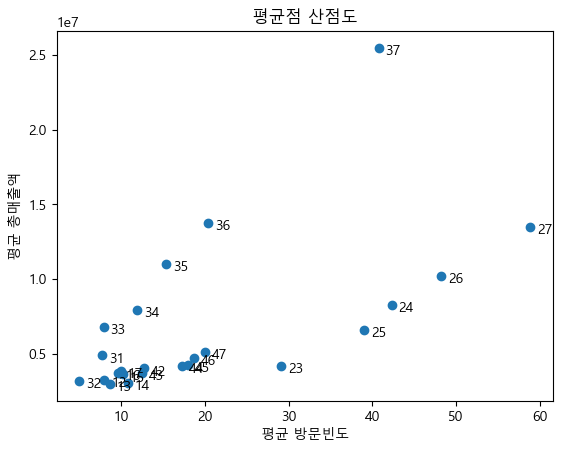

In [19]:
import matplotlib
import matplotlib.pyplot as plt 

X = np.hstack(평균방문빈도.values[0:4])
Y = np.hstack(평균총매출액.values[0:4])

# 4-6. 한글깨짐현상 방지 
matplotlib.rcParams['font.family'] = 'Malgun Gothic' 

# 4-7. 평균점 산점도 그리기
labels = []
for i in range(1,5,1):
    for j in range(1,8,1):
        labels.append(str(i)+str(j))

for label, x_count, y_count in zip(labels, X, Y):
    plt.annotate(label,
xycoords='data',
                textcoords='offset points',
                xy=(x_count, y_count), 
                xytext=(5,-5) ) 

plt.title('평균점 산점도') #차트 제목
plt.xlabel('평균 방문빈도') # X축 이름
plt.ylabel('평균 총매출액') # Y축 이름
plt.plot(X, Y,'o')

In [20]:
# 다변량분산분석 결과
# 거주지역, 구매유형에 따라 총 매출액과 방문빈도의 차이는 모두 유의한 것으로 나타났다.
# 구매유형(3)과 구매유형(2)인 고객들이 상대적으로 구매유형(1)과 구매유형(2)인 고객보다 평균 방문빈도가 높은 것으로 나타났고
# 거주지역(4, 5, 6, 7) 고객들이 나머지 지역보다 상대적으로 평균 총매출액이 높은 것을 알 수 있다.

# 특히 구매유형(3)이자 거주지역(7)인 고객과 구매유형(2)이자 거주지역(7)인 고객들은
# 타 영역에 비해 상당히 큰 차이를 보이고 있으므로
# 해당 그룹 고객들에 대해서는 각 세그먼트에 적합한 마케팅 전략을 추진하는 것이 바람직하다.

In [21]:
# 5. 공분산분석
### 분석 시나리오
# 앞서 거주지역별 총 매출액의 차이가 있는지 일원분산분석을 통해 검증한 적이 있다. 
# 그러나, 총매출액에는 거주지역뿐만 아니라, 고객들의 방문빈도 역시 유의미한 변수일 수 있다. 
# 공분산분석을 통해 방문빈도를 통제한 상태에서 거주지역별 총 매출액의 차이를 검정해보자. 

#### H0 (귀무가설)= 방문빈도를 통제한 상황에서 거주지역에 따른 총 매출액은 차이가 없다.
#### H1 (연구가설)= 방문빈도를 통제한 상황에서 거주지역에 따른 총 매출액은 차이가 있다.

In [22]:
# 5-1. 모듈 및 데이터 탑재
import pandas as pd
import pingouin as pg

df = pd.read_csv('Ashopping.csv',sep=',', encoding='CP949')
df1=df[['총_매출액','방문빈도','거주지역']]
pd.options.display.float_format = '{:.3f}'.format

# 5-2. 공분산분석
print('공분산분석 결과\n', pg.ancova(dv='총_매출액', between='거주지역',covar='방문빈도', data=df1))

# 5-3. 일원분산분석
print('\n일원분산분석 결과\n', pg.anova(dv='총_매출액', between='거주지역', data=df1))

공분산분석 결과
      Source                    SS   DF       F  p-unc   np2
0      거주지역   696696841275021.500    6   4.046  0.001 0.024
1      방문빈도 13701443685723048.000    1 477.393  0.000 0.325
2  Residual 28470960329516344.000  992     NaN    NaN   NaN

일원분산분석 결과
   Source  ddof1  ddof2      F  p-unc   np2
0   거주지역      6    993 24.759  0.000 0.130


In [23]:
# 5-4. 결과
# 방문빈도를 통제한 거주지역에 따른 총 매출액의 공분산분석은 유의하고, F값은 4.046으로 나타났다.
# 즉, 방문빈도 역시 매출액에도 일정한 영향을 주고 있다는 의미이고,
# 이에 대한 비교를 위해 방문빈도를 통제하지 않은 분산분석을 수행했을 때 F값은 24.759로 공분산분석 때보다 훨씬 크다.
# 이는 거주지역에 따른 매출액 차이를 고려할 때 방문빈도를 통제하지 않으면 거주지역별 차이가 과대평가 될 수 있다는 것을 의미한다.
# A쇼핑은 거주지역별 마케팅 전략을 수립할 때 참고해야 할 사항이다.